<a href="https://colab.research.google.com/github/amieelee233/lee/blob/master/lambda_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import root_scalar, minimize_scalar
import matplotlib.pyplot as plt

In [ ]:
rho = 0.5
sigma_eta = 1.0

In [ ]:
def f1(x, lam, rho, sigma_eta):
    a = 1 / (2 * lam * sigma_eta)
    return (a ** 2) * x**3 + 2 * rho * a * x**2 + (1 - rho * a) * x - 1

def f2(x, lam, rho, sigma_eta):
    a = 1 / (2 * lam * sigma_eta)
    return 2 * (a ** 2) * x**3 + 3 * rho * a * x**2 + (1 - 2 * rho * a) * x - 1

In [ ]:
def smallest_positive_root(f, lam, rho, sigma_eta):
    # 在一定区间内扫描正根
    xs = np.linspace(1e-10, 10, 10000)
    vals = f(xs, lam, rho, sigma_eta)
    # 找符号变化点
    roots = []
    for i in range(len(xs) - 1):
        if vals[i] * vals[i+1] < 0:
            sol = root_scalar(f, args=(lam, rho, sigma_eta),
                              bracket=[xs[i], xs[i+1]], method='brentq')
            if sol.converged and sol.root > 0:
                roots.append(sol.root)
    return min(roots) if roots else np.nan

In [ ]:
def U_social(x, lam, rho, sigma_eta):
    a = 1 / (2 * lam * sigma_eta)
    term1 = (1 / (4 * lam)) * x**2
    term2 = (sigma_eta ** 2) * (
        (a**2) * x**4 + 2 * rho * a * x**3 +
        (1 - 2 * rho * a) * x**2 - 2 * x + 1
    )
    return -(term1 + term2 + lam)

def U_streamer(x, lam, rho, sigma_eta):
    a = 1 / (2 * lam * sigma_eta)
    term1 = (1 / (4 * lam)) * x**2
    return -(term1)

def U_investor(x, lam, rho, sigma_eta):
    a = 1 / (2 * lam * sigma_eta)
    term2 = (sigma_eta ** 2) * (
        (a**2) * x**4 + 2 * rho * a * x**3 +
        (1 - 2 * rho * a) * x**2 - 2 * x + 1
    )
    return -(term2)

In [ ]:
def U_m(lam, rho, sigma_eta):
    m = smallest_positive_root(f1, lam, rho, sigma_eta)
    if np.isnan(m):
        return -np.inf
    return U_social(m, lam, rho, sigma_eta)

def U_b(lam, rho, sigma_eta):
    b = smallest_positive_root(f2, lam, rho, sigma_eta)
    if np.isnan(b):
        return -np.inf
    return U_social(b, lam, rho, sigma_eta)

In [ ]:
res_m = minimize_scalar(lambda l: -U_m(l, rho, sigma_eta), bounds=(0.01, 5), method='bounded')
res_b = minimize_scalar(lambda l: -U_b(l, rho, sigma_eta), bounds=(0.01, 5), method='bounded')

lambda_m_star = res_m.x
lambda_b_star = res_b.x

print(f"λ_m* = {lambda_m_star:.4f}")
print(f"λ_b* = {lambda_b_star:.4f}")

λ_m* = 0.1893
λ_b* = 0.1783


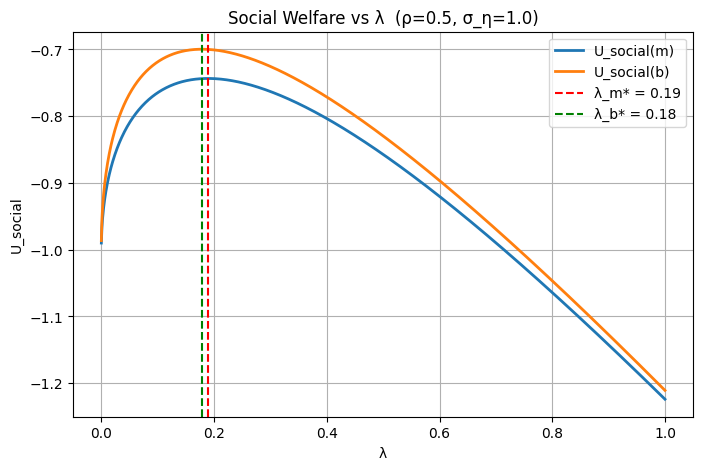

In [ ]:
lams = np.linspace(1e-4, 1, 1000)
U_m_vals = [U_m(l, rho, sigma_eta) for l in lams]
U_b_vals = [U_b(l, rho, sigma_eta) for l in lams]

plt.figure(figsize=(8,5))
plt.plot(lams, U_m_vals, label='U_social(m)', lw=2)
plt.plot(lams, U_b_vals, label='U_social(b)', lw=2)
plt.axvline(lambda_m_star, color='r', linestyle='--', label=f'λ_m* = {lambda_m_star:.2f}')
plt.axvline(lambda_b_star, color='g', linestyle='--', label=f'λ_b* = {lambda_b_star:.2f}')
plt.xlabel('λ')
plt.ylabel('U_social')
plt.legend()
plt.title(f'Social Welfare vs λ  (ρ={rho}, σ_η={sigma_eta})')
plt.grid(True)
plt.show()

创建两个滑块，rho 和 sigma_eta

In [ ]:
!pip install plotly --quiet
import numpy as np
from scipy.optimize import root_scalar
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

In [ ]:
def interactive_plot(rho, sigma_eta):
    clear_output(wait=True)
    lams = np.linspace(1e-4, 1, 1000)
    U_m_vals = [U_m(l, rho, sigma_eta) for l in lams]
    U_b_vals = [U_b(l, rho, sigma_eta) for l in lams]
    lam_m_star = lams[np.argmax(U_m_vals)]
    lam_b_star = lams[np.argmax(U_b_vals)]
    plt.figure(figsize=(8,5))
    plt.plot(lams, U_m_vals, label='U_social(m)', lw=2)
    plt.plot(lams, U_b_vals, label='U_social(b)', lw=2)
    plt.axvline(lam_m_star, color='r', linestyle='--', label=f'λ_m*={lam_m_star:.4f}')
    plt.axvline(lam_b_star, color='g', linestyle='--', label=f'λ_b*={lam_b_star:.4f}')
    plt.title(f"Social Welfare vs λ (ρ={rho:.2f}, σ_η={sigma_eta:.2f})")
    plt.xlabel('λ')
    plt.ylabel('U_social')
    plt.legend(); plt.grid(True); plt.show()

rho_slider = widgets.FloatSlider(value=0.01, min=-0.9, max=0.9, step=0.1, description='ρ')
sigma_slider = widgets.FloatSlider(value=1, min=0.05, max=10, step=0.1, description='sigma_eta')
out = widgets.interactive_output(interactive_plot, {'rho': rho_slider, 'sigma_eta': sigma_slider})
display(widgets.VBox([rho_slider, sigma_slider, out]))

In [ ]:
def direct_effect_of_lam_on_social_m(lam, rho, sigma_eta):
    m = smallest_positive_root(f1, lam, rho, sigma_eta)
    if np.isnan(m):
        return -np.inf
    term = (m**2)/(4 * lam**2)-1+(m**4)/(2*lam**3)+(rho*sigma_eta*m**3)/(lam**2)-(rho*sigma_eta*m**2)/(lam**2)
    return term

In [ ]:
def direct_effect_of_lam_on_social_b(lam, rho, sigma_eta):
    b = smallest_positive_root(f2, lam, rho, sigma_eta)
    if np.isnan(b):
        return -np.inf
    term = (b**2)/(4 * lam**2)-1+(b**4)/(2*lam**3)+(rho*sigma_eta*b**3)/(lam**2)-(rho*sigma_eta*b**2)/(lam**2)
    return term

In [ ]:
def indirect_effect_of_lam_on_social_m(lam, rho, sigma_eta):
    m = smallest_positive_root(f1, lam, rho, sigma_eta)
    if np.isnan(m):
        return -np.inf
    a = 1 / (2 * lam * sigma_eta)
    term = (m/(2 * lam)+ sigma_eta**2*2*(2 * (a ** 2) * m**3 + 3 * rho * a * m**2 + (1 - 2 * rho * a) * m - 1))*((2*a*m**3+2*rho*m**2-rho*m)/(3*a**2*m**2+4*rho*a*m+1-rho*a)*(-1/(2*lam**2*sigma_eta)))
    return term

In [ ]:
def indirect_effect_of_lam_on_social_b(lam, rho, sigma_eta):
    b = smallest_positive_root(f2, lam, rho, sigma_eta)
    if np.isnan(b):
        return -np.inf
    a = 1 / (2 * lam * sigma_eta)
    term = (b/(2 * lam))*((4*a*b**3+3*rho*b**2-2*rho*b)/(6*a**2*b**2+6*rho*a*b+1-2*rho*a)*(-1/(2*lam**2*sigma_eta)))
    return term

In [ ]:
def plot_effects(rho, sigma_eta):
    clear_output(wait=True)
    lams = np.linspace(1e-4, 1, 1000)
    direct_effect_of_lam_on_social_m_vals = [direct_effect_of_lam_on_social_m(l, rho, sigma_eta) for l in lams]
    direct_effect_of_lam_on_social_b_vals = [direct_effect_of_lam_on_social_b(l, rho, sigma_eta) for l in lams]
    indirect_effect_of_lam_on_social_m_vals = [indirect_effect_of_lam_on_social_m(l, rho, sigma_eta) for l in lams]
    indirect_effect_of_lam_on_social_b_vals = [indirect_effect_of_lam_on_social_b(l, rho, sigma_eta) for l in lams]
    U_m_vals = [U_m(l, rho, sigma_eta) for l in lams]
    U_b_vals = [U_b(l, rho, sigma_eta) for l in lams]
    lam_m_star = lams[np.argmax(U_m_vals)]
    lam_b_star = lams[np.argmax(U_b_vals)]
    plt.figure(figsize=(8,5))
    plt.plot(lams, direct_effect_of_lam_on_social_m_vals, label='direct_effect_on_social(m)', lw=2)
    plt.plot(lams, indirect_effect_of_lam_on_social_m_vals, label='indirect_effect_on_social(m)', lw=2)
    plt.plot(lams, direct_effect_of_lam_on_social_b_vals, label='direct_effect_on_social(b)', lw=2)
    plt.plot(lams, indirect_effect_of_lam_on_social_b_vals, label='indirect_effect_on_social(b)', lw=2)
    plt.axvline(lam_m_star, color='r', linestyle='--', label=f'λ_m*={lam_m_star:.4f}')
    plt.axvline(lam_b_star, color='g', linestyle='--', label=f'λ_b*={lam_b_star:.4f}')
    plt.title(f"effect of lambda on social welfare (ρ={rho:.2f}, σ_η={sigma_eta:.2f})")
    plt.xlabel('λ')
    plt.ylabel('Effects')
    plt.legend(); plt.grid(True); plt.show()

rho_slider = widgets.FloatSlider(value=0.6, min=-0.9, max=0.9, step=0.1, description='ρ')
sigma_slider = widgets.FloatSlider(value=4.65, min=0.05, max=10, step=0.1, description='sigma_eta')
out = widgets.interactive_output(plot_effects, {'rho': rho_slider, 'sigma_eta': sigma_slider})
display(widgets.VBox([rho_slider, sigma_slider, out]))

In [ ]:
def plot_effects_nearopt(rho, sigma_eta):
    clear_output(wait=True)
    lams = np.linspace(1e-4, 1, 1000)
    U_m_vals = [U_m(l, rho, sigma_eta) for l in lams]
    U_b_vals = [U_b(l, rho, sigma_eta) for l in lams]
    lam_m_star = lams[np.argmax(U_m_vals)]
    lam_b_star = lams[np.argmax(U_b_vals)]

    lams_nearopt = np.linspace(0.9*min(lam_m_star,lam_b_star), 1.1*max(lam_m_star,lam_b_star), 100)
    direct_effect_of_lam_on_social_m_vals = [direct_effect_of_lam_on_social_m(l, rho, sigma_eta) for l in lams_nearopt]
    direct_effect_of_lam_on_social_b_vals = [direct_effect_of_lam_on_social_b(l, rho, sigma_eta) for l in lams_nearopt]

    indirect_effect_of_lam_on_social_m_vals = [indirect_effect_of_lam_on_social_m(l, rho, sigma_eta) for l in lams_nearopt]
    indirect_effect_of_lam_on_social_b_vals = [indirect_effect_of_lam_on_social_b(l, rho, sigma_eta) for l in lams_nearopt]

    total_effect_of_lam_on_social_m_vals = [direct_effect_of_lam_on_social_m(l, rho, sigma_eta)+indirect_effect_of_lam_on_social_m(l, rho, sigma_eta) for l in lams_nearopt]
    total_effect_of_lam_on_social_b_vals = [direct_effect_of_lam_on_social_b(l, rho, sigma_eta)+indirect_effect_of_lam_on_social_b(l, rho, sigma_eta) for l in lams_nearopt]

    plt.figure(figsize=(8,5))
    plt.plot(lams_nearopt, direct_effect_of_lam_on_social_m_vals, label='direct_effect_on_social(m)', lw=2)
    plt.plot(lams_nearopt, indirect_effect_of_lam_on_social_m_vals, label='indirect_effect_on_social(m)', lw=2)
    plt.plot(lams_nearopt, total_effect_of_lam_on_social_m_vals, label='total_effect_on_social(m)', lw=0.5)

    plt.plot(lams_nearopt, direct_effect_of_lam_on_social_b_vals, label='direct_effect_on_social(b)', lw=2)
    plt.plot(lams_nearopt, indirect_effect_of_lam_on_social_b_vals, label='indirect_effect_on_social(b)', lw=2)
    plt.plot(lams_nearopt, total_effect_of_lam_on_social_b_vals, label='total_effect_on_social(b)', lw=0.5)

    plt.axvline(lam_m_star, color='r', linestyle='--', label=f'λ_m*={lam_m_star:.4f}')
    plt.axvline(lam_b_star, color='g', linestyle='--', label=f'λ_b*={lam_b_star:.4f}')
    plt.title(f"effect of lambda on social welfare (ρ={rho:.2f}, σ_η={sigma_eta:.2f})")
    plt.xlabel('λ')
    plt.ylabel('Effects')
    plt.legend(); plt.grid(True); plt.show()

rho_slider = widgets.FloatSlider(value=0.6, min=-0.9, max=0.9, step=0.1, description='ρ')
sigma_slider = widgets.FloatSlider(value=4.65, min=0.05, max=10, step=0.1, description='sigma_eta')
out = widgets.interactive_output(plot_effects_nearopt, {'rho': rho_slider, 'sigma_eta': sigma_slider})
display(widgets.VBox([rho_slider, sigma_slider, out]))